<h1 align='center'> Applied Data Science Capstone Project </h1>

### Project Overview:
This notebook will be used to predict the possibility and severity of car's accidents occuring when taking a certain route.

In [20]:
import numpy as np
import pandas as pd

In [21]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [22]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Snippets for Quiz 1

In [23]:
# Checking no. of attributes in Seattle accident data
len(df.columns)

37

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194673 entries, 1 to 219547
Data columns (total 37 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null object
JUNCTIONTYPE      188344 non-null obj

In [25]:
# Checking total number of empty inputs in " ROADCOND"
len(df[df['ROADCOND'].isnull()])

5012

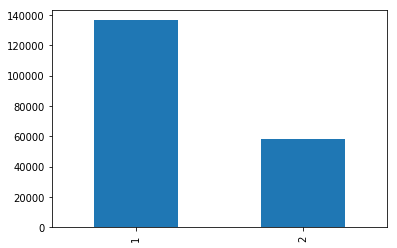

In [26]:
# Checking dataset balanced or not
%matplotlib inline
df['SEVERITYCODE'].value_counts().plot(kind='bar')

# Project Phases:

In [27]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

### Data Pre-processing

In [28]:
data = df[['SEVERITYCODE','PERSONCOUNT','VEHCOUNT','WEATHER','ROADCOND','LIGHTCOND','INATTENTIONIND','UNDERINFL']]
attributes = data.columns.to_list()

The data obtained has many null values. We could have eliminated the null values but that would result in loss of dataset. Therefore, we replace the NaN values with the value with highest frequency in th column, since that value has the highest probability.

In [29]:
for column in attributes:
    data[column].fillna(data[column].mode()[0], inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [30]:
data['INATTENTIONIND'].replace('Y',1,inplace=True)
data['INATTENTIONIND'].replace('N',0,inplace=True)
data.INATTENTIONIND.astype('int64')
data['UNDERINFL'].replace('Y',1,inplace=True)
data['UNDERINFL'].replace('N',0,inplace=True)
data.UNDERINFL.astype('int64');

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [31]:
weathers=pd.get_dummies(data.WEATHER)
data = pd.concat([data,weathers],axis=1)

In [32]:
data.drop(columns='WEATHER', inplace=True)

In [33]:
data.rename(columns={'Fog/Smog/Smoke': 'Smoke','Sleet/Hail/Freezing Rain':'Hail', 'Unknown': 'Unpredictable Weather', 'Blowing Sand/Dirt': 'Sandy'}, inplace=True)

In [34]:
data.head()

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,ROADCOND,LIGHTCOND,INATTENTIONIND,UNDERINFL,Sandy,Clear,Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Hail,Snowing,Unpredictable Weather
OBJECTID,,,,,,,,,,,,,,,,,,
1,2,2,2,Wet,Daylight,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,2,2,Wet,Dark - Street Lights On,1,0,0,0,0,0,0,0,1,0,0,0,0
3,1,4,3,Dry,Daylight,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1,3,3,Dry,Daylight,1,0,0,1,0,0,0,0,0,0,0,0,0
5,2,2,2,Wet,Daylight,1,0,0,0,0,0,0,0,1,0,0,0,0



Performing the One-Hot-Encoding for ROADCOND and  LIGHTCOND as well.

In [35]:
lighting = pd.get_dummies(data.LIGHTCOND)
data = pd.concat([data,lighting],axis=1)

In [36]:
data.drop('LIGHTCOND',axis=1,inplace=True)
data.rename(columns={'Unknown': 'Unknown Lighting'}, inplace=True)

In [37]:
roads = pd.get_dummies(data.ROADCOND, prefix='roadcond_')
data = pd.concat([data,roads],axis=1)

In [38]:
data.drop('ROADCOND',axis=1,inplace=True)
data.head()

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,Sandy,Clear,Smoke,Other,Overcast,...,Unknown Lighting,roadcond__Dry,roadcond__Ice,roadcond__Oil,roadcond__Other,roadcond__Sand/Mud/Dirt,roadcond__Snow/Slush,roadcond__Standing Water,roadcond__Unknown,roadcond__Wet
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,2,2,2,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,4,3,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,3,3,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,2,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
data.shape

(194673, 34)

### Data Visualization

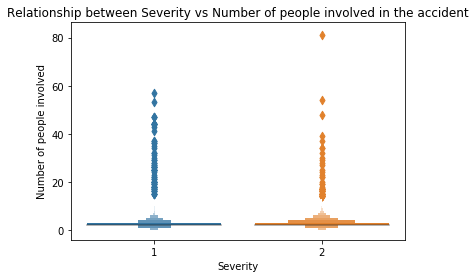

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxenplot(x='SEVERITYCODE',y='PERSONCOUNT',data=data)
plt.title("Relationship between Severity vs Number of people involved in the accident")
plt.xlabel("Severity")
plt.ylabel("Number of people involved")
plt.show()

<strong> Observation #01: </strong>
<p> Through this we could conclude that if there are higher people traveling, the
possibility of severe collision is less since more people mean more traffic
which leads to less possible speeding. </p>

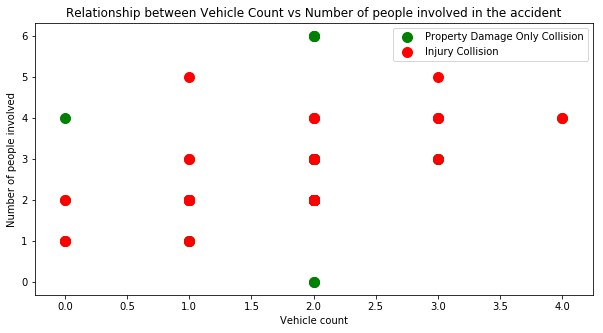

In [44]:
ax = df[df['SEVERITYCODE'] == 1][0:50].plot(kind='scatter', x='VEHCOUNT', y='PERSONCOUNT', color='Green', label='Property Damage Only Collision',s=100);
df[df['SEVERITYCODE'] == 2][0:50].plot(kind='scatter', x='VEHCOUNT', y='PERSONCOUNT', color='Red', label='Injury Collision', ax=ax,figsize=(10,5), s=100);
plt.title("Relationship between Vehicle Count vs Number of people involved in the accident")
plt.xlabel("Vehicle count")
plt.ylabel("Number of people involved")
plt.show()

<strong> Observation #02: </strong> 
<p> Seeing this plot, we could conclude that conclude that when the number of
vehicles involved in the accident were high, there was more injury collision
than the collisions which only damaged the property. </p>

### Building the model

In [45]:
y = np.asarray(data['SEVERITYCODE'])
y[0:5]

array([2, 1, 1, 1, 2])

In [46]:
X = data.drop('SEVERITYCODE', axis=1)
X = np.asarray(X[X.columns.to_list()])
X = X.astype(int)

#### Normalizing the model

In [47]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.33020207,  0.12553783,  0.        , -0.2217116 , -0.01696304,
        -1.21707436, -0.05414257, -0.06551471, -0.03476509,  2.45445634,
        -0.00506801, -0.45298634, -0.011333  , -0.02409974, -0.06841713,
        -0.28988624, -0.08920831, -0.07872239, -0.576075  , -0.00751719,
        -0.1141037 ,  0.77768637, -0.17682024, -0.06551471, -0.03476509,
        -0.27267986, -1.4099744 , -0.07905204, -0.01813462, -0.02604842,
        -0.01963186, -0.07200071, -0.02431221, -0.28975087,  1.76085874],
       [-0.33020207,  0.12553783,  0.        , -0.2217116 , -0.01696304,
        -1.21707436, -0.05414257, -0.06551471, -0.03476509, -0.4074222 ,
        -0.00506801,  2.2075721 , -0.011333  , -0.02409974, -0.06841713,
        -0.28988624, -0.08920831, -0.07872239,  1.73588509, -0.00751719,
        -0.1141037 , -1.2858654 , -0.17682024, -0.06551471, -0.03476509,
        -0.27267986, -1.4099744 , -0.07905204, -0.01813462, -0.02604842,
        -0.01963186, -0.07200071, -0.02431221, -0.

#### Splitting the train/test dataset

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 35) (155738,)
Test set: (38935, 35) (38935,)


As there are only two classes to deal with hence a logistic regression classifier could be effective in this case.

#### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,jaccard_similarity_score,log_loss,f1_score

Using Grid-Search in order to fine-tune our model parameters.

In [50]:
params_lr = { 'C':[0.001,0.01,0.1,0.5],
             'solver': ['newton-cg','lbfgs','liblinear']
             }
lr = LogisticRegression()
gridsearch_lr = GridSearchCV(lr, params_lr,cv=5,iid=True)
gridsearch_lr.fit(X_train,y_train)

lr_best_params = gridsearch_lr.best_params_
print("Best accuracy obtained",gridsearch_lr.best_score_)
print("Best parameters obtained",gridsearch_lr.best_params_)

lr_best_params

/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Best accuracy obtained 0.6997521478380356
Best parameters obtained {'C': 0.001, 'solver': 'liblinear'}


{'C': 0.001, 'solver': 'liblinear'}

In [51]:
lr = LogisticRegression(C=lr_best_params['C'], solver=lr_best_params['solver'])
lr.fit(X_train,y_train)
lr_predictions = lr.predict(X_test)
lr_predictions_training = lr.predict_proba(X_train)
acc = (accuracy_score(y_test, lr_predictions))*100

In [53]:
table = pd.DataFrame({
    'Jaccard Similarity Score': [round(jaccard_similarity_score(y_test,lr_predictions)*100,2)],
    'F1 Score': [f1_score(y_test,lr_predictions,average='weighted',labels=np.unique(lr_predictions))],
    'Log loss': [log_loss(y_train,lr_predictions_training)],
    'Test Accuracy': [acc]})

In [55]:
table.reset_index(drop=True,inplace=True)
table

,Jaccard Similarity Score,F1 Score,Log loss,Test Accuracy
0,70.58,0.608417,0.577406,70.57917


 Conclusion: The model is 70.5% accurate on test data.